# Configuration Step
##      Read donaloded files from malaria2/cell_images folder 
##      Create traning , validation and testing folders 
##      Set split percentage 
##      All Train, test and Validation folders will have Uninfected and Parasitized folders 
##      Folders name Uninfected and Parasitized will be used as labels 

In [17]:
####Config.py
import os

# initialize the path to the *original* input directory of images
ORIG_INPUT_DATASET = "/Users/ashish/Health Analytics/imageclassification/malaria2/cell_images"

# initialize the base path to the *new* directory that will contain
# our images after computing the training and testing split
BASE_PATH = "/Users/ashish/Health Analytics/imageclassification/malaria2"

# derive the training, validation, and testing directories
TRAIN_PATH = os.path.sep.join([BASE_PATH, "training"])
VAL_PATH = os.path.sep.join([BASE_PATH, "validation"])
TEST_PATH = os.path.sep.join([BASE_PATH, "testing"])

# define the amount of data that will be used training
TRAIN_SPLIT = 0.8

# the amount of validation data will be a percentage of the
# *training* data
VAL_SPLIT = 0.1

# Build folders and Distribute images

In [ ]:
#########BuildDataset.py 


# USAGE
# python build_dataset.py

# import the necessary packages
import sys 
sys.path.insert(0, "/Users/ashish/Health Analytics/imageclassification")
from pyimagesearch import config
from imutils import paths
import random
import shutil
import os


#print(config.TRAIN_PATH)

# grab the paths to all input images in the original input directory
# and shuffle them
imagePaths = list(paths.list_images(config.ORIG_INPUT_DATASET))
random.seed(42)
random.shuffle(imagePaths)

# compute the training and testing split
i = int(len(imagePaths) * config.TRAIN_SPLIT)
trainPaths = imagePaths[:i]
testPaths = imagePaths[i:]

# we'll be using part of the training data for validation
i = int(len(trainPaths) * config.VAL_SPLIT)
valPaths = trainPaths[:i]
trainPaths = trainPaths[i:]

# define the datasets that we'll be building
datasets = [
	("training", trainPaths, config.TRAIN_PATH),
	("validation", valPaths, config.VAL_PATH),
	("testing", testPaths, config.TEST_PATH)
]

# loop over the datasets
for (dType, imagePaths, baseOutput) in datasets:
	# show which data split we are creating
	print("[INFO] building '{}' split".format(dType))

	# if the output base output directory does not exist, create it
	if not os.path.exists(baseOutput):
		print("[INFO] 'creating {}' directory".format(baseOutput))
		os.makedirs(baseOutput)

	# loop over the input image paths
	for inputPath in imagePaths:
		# extract the filename of the input image along with its
		# corresponding class label
		filename = inputPath.split(os.path.sep)[-1]
		label = inputPath.split(os.path.sep)[-2]

		# build the path to the label directory
		labelPath = os.path.sep.join([baseOutput, label])

		# if the label output directory does not exist, create it
		if not os.path.exists(labelPath):
			print("[INFO] 'creating {}' directory".format(labelPath))
			os.makedirs(labelPath)

		# construct the path to the destination image and then copy
		# the image itself
		p = os.path.sep.join([labelPath, filename])
		shutil.copy2(inputPath, p)

In [7]:
import matplotlib
#matplotlib.use("Agg")

# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.optimizers import SGD
#from pyimagesearch.resnet import ResNet

from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19

from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D ,Dense,Dropout,Input ,Convolution2D,Flatten,BatchNormalization,GlobalMaxPooling2D,GlobalAveragePooling3D
from keras.models import Model
from keras.optimizers import Adam
from keras.models import load_model

In [5]:
 ########################3
# 

# define the total number of epochs to train for along with the
# initial learning rate and batch size

NUM_EPOCHS = 20
INIT_LR = 1e-2
BS = 32

def poly_decay(epoch):
	# initialize the maximum number of epochs, base learning rate,
	# and power of the polynomial
	maxEpochs = NUM_EPOCHS
	baseLR = INIT_LR
	power = 1.0

	# compute the new learning rate based on polynomial decay
	alpha = baseLR * (1 - (epoch / float(maxEpochs))) ** power

	# return the new learning rate
	return alpha

# determine the total number of image paths in training, validation,
# and testing directories
totalTrain = len(list(paths.list_images(TRAIN_PATH)))
totalVal = len(list(paths.list_images(VAL_PATH)))
totalTest = len(list(paths.list_images(TEST_PATH)))

# initialize the training training data augmentation object
trainAug = ImageDataGenerator(
	rescale=1. / 255.0,
	rotation_range=20,
	zoom_range=0.05,
	width_shift_range=0.05,
	height_shift_range=0.05,
	shear_range=0.05,
	horizontal_flip=True,
	fill_mode="nearest")

# initialize the validation (and testing) data augmentation object
valAug = ImageDataGenerator(rescale=1 / 255.0)

# initialize the training generator
trainGen = trainAug.flow_from_directory(
	TRAIN_PATH,
	class_mode="categorical",
	target_size=(150, 150),
	color_mode="rgb",
	shuffle=True,
	batch_size=BS)

# initialize the validation generator
valGen = valAug.flow_from_directory(
	VAL_PATH,
	class_mode="categorical",
	target_size=(150, 150),
	color_mode="rgb",
	shuffle=False,
	batch_size=BS)

# initialize the testing generator
testGen = valAug.flow_from_directory(
	TEST_PATH,
	class_mode="categorical",
	target_size=(150, 150),
	color_mode="rgb",
	shuffle=False,
	batch_size=BS)

model_vgg19 = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

#model_vgg19.summary()


#Add the fully-connected layers for Binary classification 

############working 
x = model_vgg19.output
#x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
#x = Dense(256, activation='relu')(x)
#x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)
############working #################

Found 19842 images belonging to 2 classes.
Found 2204 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
#Create your own model 

pretrained_model = Model(inputs=model_vgg19.input, outputs=x)                                                                                                                                                                                                   

for layer in model_vgg19.layers:
    layer.trainable = False
opt = SGD(lr=INIT_LR, momentum=0.1,nesterov=True)    
opt2= Adam(lr=INIT_LR, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)


pretrained_model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
from keras.callbacks import ModelCheckpoint, EarlyStopping
weight_path = "model_best4.h5"
pretrained_model.summary()

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = False)

early = EarlyStopping(monitor="val_loss", mode="min",patience=3)
                      


callbacks = [LearningRateScheduler(poly_decay),checkpoint, early]
H = pretrained_model.fit_generator(
	trainGen,
	steps_per_epoch=totalTrain // BS,
	validation_data=valGen,
	validation_steps=totalVal // BS,
	epochs=NUM_EPOCHS,
	callbacks=callbacks)


########Load Model ###############


# reset the testing generator and then use our trained model to
# make predictions on the data
print("[INFO] evaluating network...")
testGen.reset()
predIdxs = pretrained_model.predict_generator(testGen,
	steps=(totalTest // BS) + 1)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testGen.classes, predIdxs,
	target_names=testGen.class_indices.keys()))


pretrained_model.save(BASE_PATH + '/amazon_vgg19.h5') 


## Load previously trained model for prediction and performance evaluation

In [8]:
#pretrained_model = load_model(BASE_PATH +"/amazon_vgg19.h5")
pretrained_model = load_model("/Users/ashish/Health Analytics/imageclassification/malaria/model_150_VGG16_March20.h5")

# reset the testing generator and then use our trained model to
# make predictions on the data
print("[INFO] evaluating network...")
testGen.reset()
predIdxs = pretrained_model.predict_generator(testGen,
	steps=(totalTest // BS) + 1)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testGen.classes, predIdxs,
	target_names=testGen.class_indices.keys()))

Instructions for updating:
Use tf.cast instead.
[INFO] evaluating network...
              precision    recall  f1-score   support

 Parasitized       0.98      0.90      0.93      2726
  Uninfected       0.91      0.98      0.94      2786

   micro avg       0.94      0.94      0.94      5512
   macro avg       0.94      0.94      0.94      5512
weighted avg       0.94      0.94      0.94      5512



In [26]:
pretrained_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [9]:
test_eval= pretrained_model.evaluate_generator(testGen, steps=((totalTest // BS) + 1))
test_eval[1]

0.9381349782293179

### Show few predicted labels using Trained model

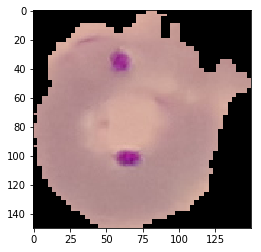

Parasitized


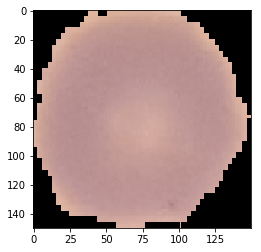

Uninfected


In [12]:
from keras.preprocessing import image
import matplotlib
import numpy as np 
from keras.models import load_model

#pretrained_model = load_model(BASE_PATH +"/amazon_vgg19.h5")

img = image.load_img(BASE_PATH +"/demo/C39P4thinF_original_IMG_20150622_105102_cell_95.png", target_size=(150, 150))

img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img_tensor[0])
plt.show()

activations = pretrained_model.predict(img_tensor)

predic_label  = 'Parasitized' if (activations[0][0]> 0.5) else 'Uninfected'
print (predic_label)


img = image.load_img(BASE_PATH +"/demo/C1_thinF_IMG_20150604_104919_cell_134.png", target_size=(150, 150))

img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

activations = pretrained_model.predict(img_tensor)
predic_label  = 'Parasitized' if (activations[0][0]> 0.5) else 'Uninfected'
print (predic_label)

### Prediction using Out of Sample Images 

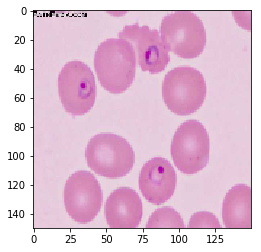

Parasitized


In [15]:
img = image.load_img(BASE_PATH +"/demo/malaria-intrenet.png", target_size=(150, 150))

img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

activations = pretrained_model.predict(img_tensor)
predic_label  = 'Parasitized' if (activations[0][0]> 0.5) else 'Uninfected'
print (predic_label)

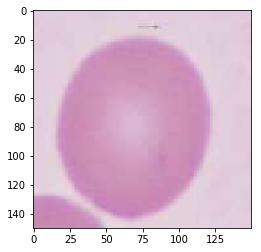

Uninfected


In [20]:
img = image.load_img(BASE_PATH +"/demo/MALARIA_UNINFECTED.png", target_size=(150, 150))

img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

activations = pretrained_model.predict(img_tensor)
predic_label  = 'Parasitized' if (activations[0][0]> 0.5) else 'Uninfected'
print (predic_label)

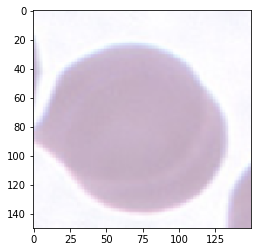

Uninfected


In [21]:
img = image.load_img(BASE_PATH +"/demo/malaria_uninfected2.png", target_size=(150, 150))

img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

activations = pretrained_model.predict(img_tensor)
predic_label  = 'Parasitized' if (activations[0][0]> 0.5) else 'Uninfected'
print (predic_label)

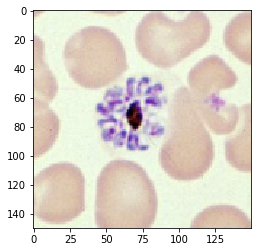

Parasitized


In [22]:
img = image.load_img(BASE_PATH +"/demo/malaria-intrenet2.png", target_size=(150, 150))

img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

activations = pretrained_model.predict(img_tensor)
predic_label  = 'Parasitized' if (activations[0][0]> 0.5) else 'Uninfected'
print (predic_label)

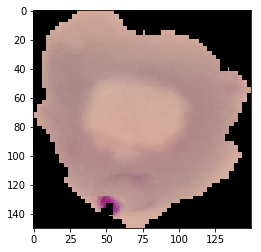

Uninfected


In [25]:
img = image.load_img(BASE_PATH +"/testing/Parasitized/C39P4thinF_original_IMG_20150622_110115_cell_116.png", target_size=(150, 150))

img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

activations = pretrained_model.predict(img_tensor)
predic_label  = 'Parasitized' if (activations[0][0]> 0.5) else 'Uninfected'
print (predic_label)